# Computational Drug Discovery - [Part 5] - Comparing Regressor models

In Part 5, we will be comparing several ML algorithms for building regression models of Plasmodium falciparum Hexose Transporter 1(pfHT1) inhibitors.

## Import and Install Libraries

We will be using the lazypredict library to build our regression models then compare them. Credits to the data scientist Shankar Rao Pandala who developed this library

In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/home/wachirah/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## Load the Dataset

In [3]:
df = pd.read_csv('pfHT1_bioactivity_data_pIC50_pubchem_fingerprints.csv')

## Split the dataset into X and Y variables

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
788,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
789,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
790,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = df['pIC50']
Y

0     4.92
1     4.92
2     4.92
3     4.95
4     4.92
      ... 
787   4.92
788   4.92
789   4.92
790   4.92
791   5.31
Name: pIC50, Length: 792, dtype: float64

## Pre-processing of Data

### Examine the data

In [6]:
X.shape, Y.shape

((792, 881), (792,))

### Remove the low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1-.8)))
X = selection.fit_transform(X)
X.shape

(792, 166)

### Data splitting using 80/20 ratio

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

## Build the regressor models

In [9]:
#We'll use the default parameters used by the lazypredict authors on their test example
reg = LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test = reg.fit(X_train,X_test,Y_train,Y_test)

100%|██████████| 42/42 [01:05<00:00,  1.57s/it]


In [10]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
TransformedTargetRegressor,11224383729380141056.00,-568323226804057728.00,323575262.67,0.11
LinearRegression,11224383729380141056.00,-568323226804057728.00,323575262.67,0.14
KernelRidge,2946.09,-148.12,5.24,0.19
GaussianProcessRegressor,2407.53,-120.85,4.74,0.51
Lars,190.02,-8.57,1.33,0.40
RANSACRegressor,50.71,-1.52,0.68,3.14
MLPRegressor,30.60,-0.50,0.53,5.51
ExtraTreeRegressor,30.09,-0.47,0.52,0.14
DecisionTreeRegressor,29.98,-0.47,0.52,0.13


In [11]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
TransformedTargetRegressor,11224383729380141056.00,-568323226804057728.00,323575262.67,0.11
LinearRegression,11224383729380141056.00,-568323226804057728.00,323575262.67,0.14
KernelRidge,2946.09,-148.12,5.24,0.19
GaussianProcessRegressor,2407.53,-120.85,4.74,0.51
Lars,190.02,-8.57,1.33,0.40
RANSACRegressor,50.71,-1.52,0.68,3.14
MLPRegressor,30.60,-0.50,0.53,5.51
ExtraTreeRegressor,30.09,-0.47,0.52,0.14
DecisionTreeRegressor,29.98,-0.47,0.52,0.13


Based on the above analysis, we see the Random forest regressor had a lower performance( R^2 value(0.06)) to what we had in Part 4 of this project(0.1746)

Default parameters could be a contributor to the lower performance. However, the main aim here was to compare the algorithms and see which one(s) perform best then carry out hyper-optimization on it

In [12]:
#[0 if i < 0 else i for i in train.iloc[:,0] ]

## Data Visualization of how the ML algorithms compare

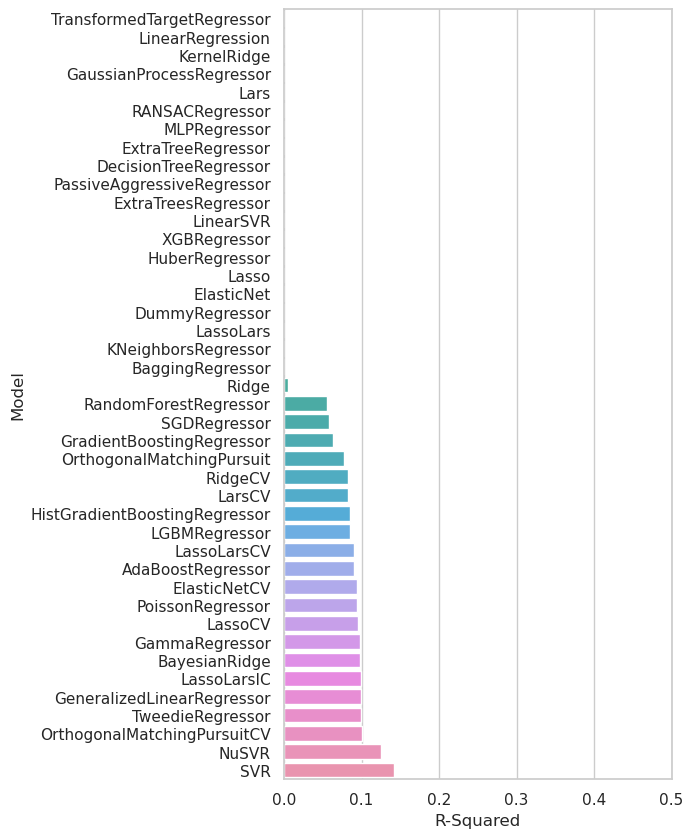

In [13]:
#We will plot a barplot of the R squared values for the model

import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='R-Squared', data=train)
ax.set(xlim=(0.0,0.5))
#plt.xticks(rotation=90)
plt.show()

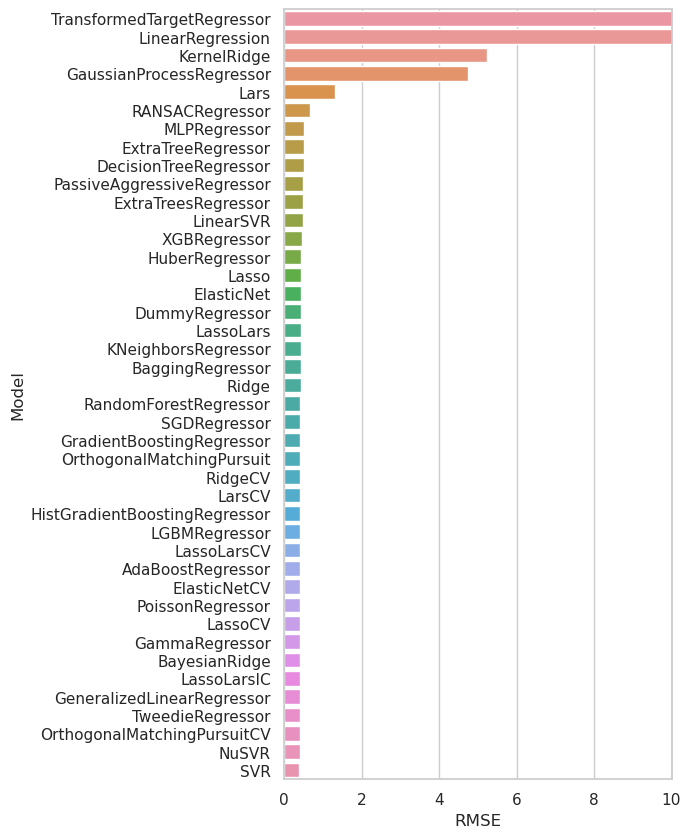

In [14]:
#Bar plot of RMSE values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='RMSE', data=train)
ax.set(xlim=(0,10))
plt.show()